# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ghaniyy Zhafran]
- **Email:** [ganizafran@gmail.com]
- **ID Dicoding:** [ghaniyyzhafran]

## Menentukan Pertanyaan Bisnis

- Bagaimana Jumlah peminjam pada suatu season? Apakah terdapat season tertentu yang jumlah peminjamnya lebih tinggi ataupun lebih rendah?
- Bagaimana perbandingan peminjam terdaftar antara tahun pertama dan tahun kedua? Apakah terdapat peningkatan di tahun ke 2 dibandingkan dengan tahun pertama?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/Hansmode/T2B/refs/heads/main/day.csv")
customers_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada tahap ini merupakan proses gathering data dengan cara mengimport dataset dari sebuah url raw github dalam format csv dan menyimpannya dalam sebuah dataframe menggunakan library pandas
- Selanjutnya menjalankan code .head() yang berfungsi untuk meilihat 5 data pertama dari dataset sebagai gambaran awal

### Assessing Data

In [8]:
customers_df.info()
print(" ")
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
 
Jumlah duplikasi:  0


In [9]:
customers_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
customers_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada tahap assessing data ini akan dilakukan pemeriksaan terhadap data, apakah terdapat duplikasi, missing value, dan sebagainya.
- Berdasarkan pemeriksaan tersebut tidak ditemukan adanya duplikasi, missing value, dan data yang tidak akurat.

### Cleaning Data

In [11]:
customers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.isna().sum()


Jumlah duplikasi:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Berdasarkan data yang didapat dari dataset, bahwa tidak terdapat duplikat, missing value, dan juga inaccurate value
- Sehingga tidak perlu dilakukan pembersihan data

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
customers_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [13]:
customers_df.groupby(by="season").agg({
    "cnt": ["mean", "sum", "max"]
})

cnt               
               mean      sum   max
season                            
1       2604.132597   471348  7836
2       4992.331522   918589  8362
3       5644.303191  1061129  8714
4       4728.162921   841613  8555

In [14]:
customers_df.groupby(by="yr").agg({
    "registered": ["mean", "sum", "max"]
})


registered               
           mean      sum   max
yr                            
0   2728.358904   995851  4614
1   4581.450820  1676811  6946

**Insight:**
- Pada explorarity pertama menunjukkan jumlah, rata-rata dan juga nilai maksimal peminjam dari setiap season
- Pada explorarity kedua meununjukkan perbedaan jumlah, rata-rata dan juga nilai maksimal antara tahun pertama dan juga tahun kedua

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-24-70c06ae2d04a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="season", y="cnt", data=customers_df, estimator="mean", ci=None, color="#008000")


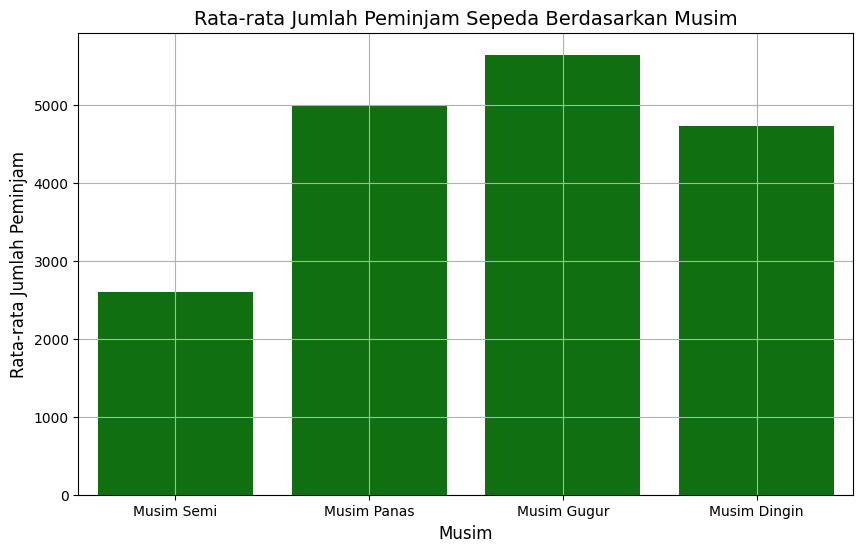

In [24]:
plt.figure(figsize=(10, 6))

sns.barplot(x="season", y="cnt", data=customers_df, estimator="mean", ci=None, color="#008000")

plt.title('Rata-rata Jumlah Peminjam Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Jumlah Peminjam', fontsize=12)

# Mengganti label angka dengan nama musim
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])

plt.grid(True)

plt.show()


### Pertanyaan 2:

<ipython-input-28-8ec05b172709>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='yr', y='registered', data=customers_df, estimator="sum", ci=None, palette="Blues")
<ipython-input-28-8ec05b172709>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='yr', y='registered', data=customers_df, estimator="sum", ci=None, palette="Blues")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

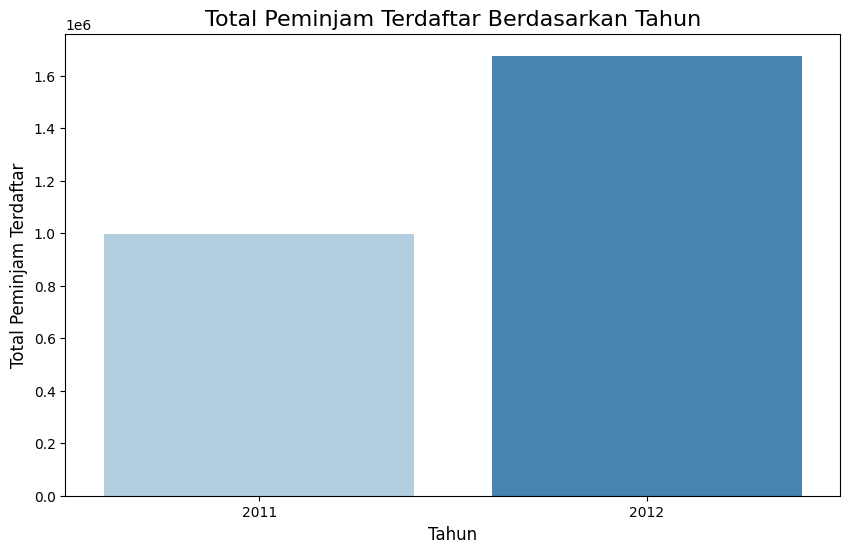

In [28]:
plt.figure(figsize=(10, 6))

sns.barplot(x='yr', y='registered', data=customers_df, estimator="sum", ci=None, palette="Blues")

plt.title('Total Peminjam Terdaftar Berdasarkan Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Peminjam Terdaftar', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['2011', '2012'])

plt.show()


**Insight:**
- Pada Pertanyaan 1 merupakan hasil visualisasi dari analisis data rata-rata jumlah peminjam sepeda berdasarkan season
- Pada pertanyaan 2 merupakan hasil visualisasi dari analisis data total peminjam yang terdaftar antara tahun pertama dan tahun kedua

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan Analisis Data dapat diketahui bahwa setiap season mengalami perubahan jumlah peminjam. Pada musim semi merupakan jumlah peminjam terendah dibandingkan dengan musim lainnya. Sedangkan Musim Gugur merupakan Musim tertinggi dalam jumlah peminjam sepeda
- Berdasarkan Analisis Data dapat diketahui bahwa terdapat peningkatan jumlah peminjam yang terdaftar pada tahun kedua dibandingkan dengan jumlah peminjam pada tahun pertama